Tutorial extract PDF file dalam satu folder menjadi dataframe dan file pickle (.pkl)
https://youtu.be/GqRvV_r_oJ0?si=x72y4Bh8kT0BZhui

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/didisundiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<positron-console-cell-15>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



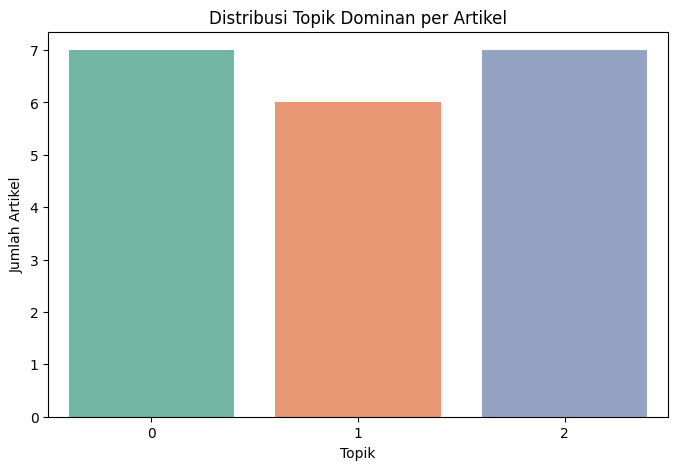

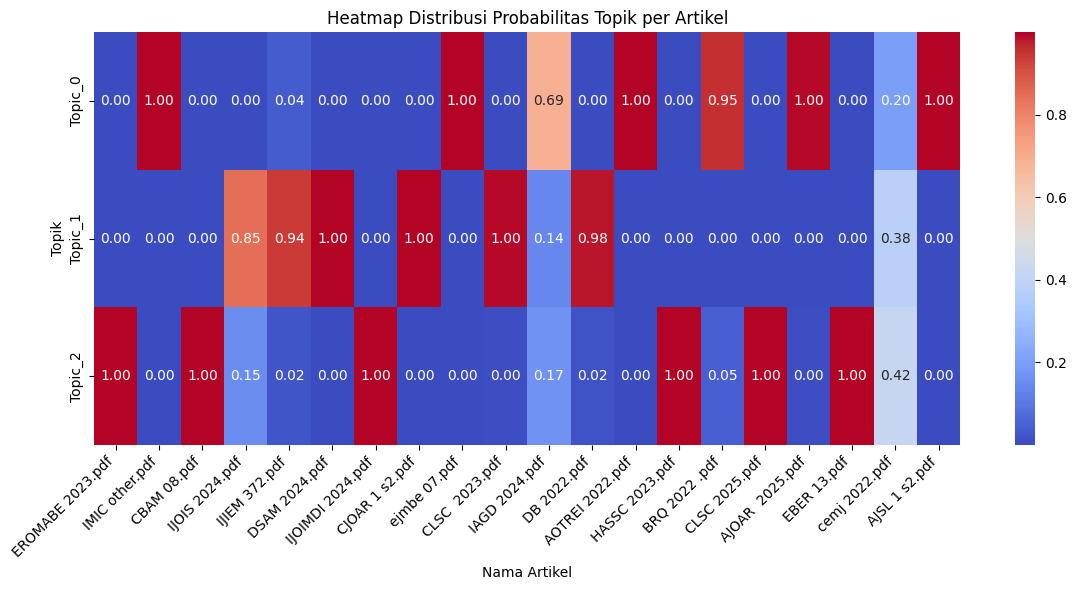


🧠 Topik 0:
csr, social, environmental, revenue, tourism, corporate, islamic, resilience, performance, network

🧠 Topik 1:
carbon, risk, green, supply, chain, performance, environmental, companies, method, table

🧠 Topik 2:
data, development, leadership, systems, organizational, employees, product, economic, support, countries


In [15]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# --- 1. Setup dan Stopwords ---
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stopwords bawaan + tambahan manual
custom_stopwords = [
    'yes', 'rm', 'eu', 'https', 'org', 'management', 'journal', 'bia', 'usa',
    'tagedhtransformational', 'from', 'subject', 'eu', 'edu', 'use', 'sustain', 'sustainability',
    'sustainable', 'work', 'leibniz', 'zbw', 'us', 'cogent', 'business', 'trend', 'issn',
    'from', 'subject', 're', 'edu', 'use', 'business', 'trend', 'company', 'new', 'said', 'percent',
    'economy', 'econom', 'economi', 'trump', 'per', 'cent', 'would', 'could', 'also', 'dont',
    'mani', 'cnbc', 'get', 'make', 'million', 'help', 'cnn', 'gm', 'subscrib', 'pm',
    'hkt', 'gmt', 'go', 'water', 'chines', 'china', 'fed', 'huawei',
    'coronavirus', 'pandemic', 'al', 'ai', 'et', 'plm', 'gdp', 'sciencedirect',
    'unit', 'state', 'sp', 'facebook', 'yes', 'vol', 'httpsdoiorg', 'eber', 'annal',
    'kenya', 'malaysia', 'japan', 'asia', 'articl', 'article',
    'login', 'email', 'filibust', 'appl', 'iphon',
    'hong', 'kong', 'president', 'democrat',
    'xinhua', 'dow', 'north', 'africa',
    'billion','think','includ', 'doi', 'ie', 'jel',
    'like', 'year', 'mr', 'work', 'management', 'system'
    ]
all_stopwords = stopwords.words('english') + custom_stopwords

# --- 2. Load dan Preprocessing Data ---
df = pd.read_pickle("dataarticle.pkl")

def clean_text(text):
    text = re.sub(r'\d+', '', str(text))              # hapus angka
    text = re.sub(r'\W+', ' ', text)                  # hapus simbol
    return text.lower()

df['cleaned'] = df['textdata'].fillna('').apply(clean_text)

# --- 3. Vectorisasi dan LDA ---
vectorizer = CountVectorizer(stop_words=all_stopwords, max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['cleaned'])

# n_components = jumlah topik
lda = LatentDirichletAllocation(n_components=3, random_state=42)
topic_matrix = lda.fit_transform(X)

# --- 4. Klasifikasi Topik Dominan ---
df['Dominant_Topic'] = topic_matrix.argmax(axis=1)

# --- 5. Visualisasi Bar Chart ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Dominant_Topic', data=df, palette='Set2')
plt.title("Distribusi Topik Dominan per Artikel")
plt.xlabel("Topik")
plt.ylabel("Jumlah Artikel")
plt.show()

# --- 6. Visualisasi Heatmap ---
# range = jumlah topik
heatmap_df = pd.DataFrame(topic_matrix, columns=[f"Topic_{i}" for i in range(3)])
heatmap_df['articlename'] = df['articlename']
heatmap_df = heatmap_df.set_index('articlename').T

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Distribusi Probabilitas Topik per Artikel")
plt.xlabel("Nama Artikel")
plt.ylabel("Topik")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 7. Tampilkan Kata Kunci Tiap Topik ---
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\n🧠 Topik {idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())


In [16]:
topic_matrix

array([[9.35027525e-05, 9.11345656e-05, 9.99815363e-01],
       [9.99698608e-01, 1.51530177e-04, 1.49861664e-04],
       [5.72730426e-05, 5.84323748e-05, 9.99884295e-01],
       [1.21040280e-04, 8.45845510e-01, 1.54033450e-01],
       [3.64472163e-02, 9.40977248e-01, 2.25755357e-02],
       [1.13259406e-04, 9.99771513e-01, 1.15228007e-04],
       [8.04220113e-05, 8.01858192e-05, 9.99839392e-01],
       [6.68431095e-05, 9.99870142e-01, 6.30145531e-05],
       [9.99797116e-01, 9.91897458e-05, 1.03694725e-04],
       [9.35696371e-05, 9.95588483e-01, 4.31794753e-03],
       [6.89206589e-01, 1.39066914e-01, 1.71726497e-01],
       [7.39125591e-05, 9.81344071e-01, 1.85820165e-02],
       [9.99781146e-01, 1.10318832e-04, 1.08534856e-04],
       [8.62536375e-05, 8.38288769e-05, 9.99829917e-01],
       [9.54454848e-01, 7.18204516e-05, 4.54733317e-02],
       [4.12834254e-05, 4.41289117e-05, 9.99914588e-01],
       [9.95568760e-01, 1.15861174e-04, 4.31537919e-03],
       [2.78600928e-03, 8.87997

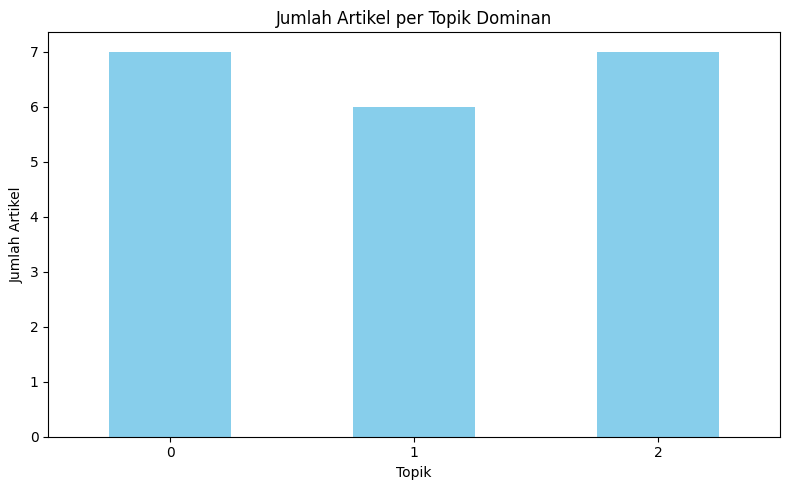

In [17]:
topic_counts = df['Dominant_Topic'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
topic_counts.plot(kind='bar', color='skyblue')
plt.title("Jumlah Artikel per Topik Dominan")
plt.xlabel("Topik")
plt.ylabel("Jumlah Artikel")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


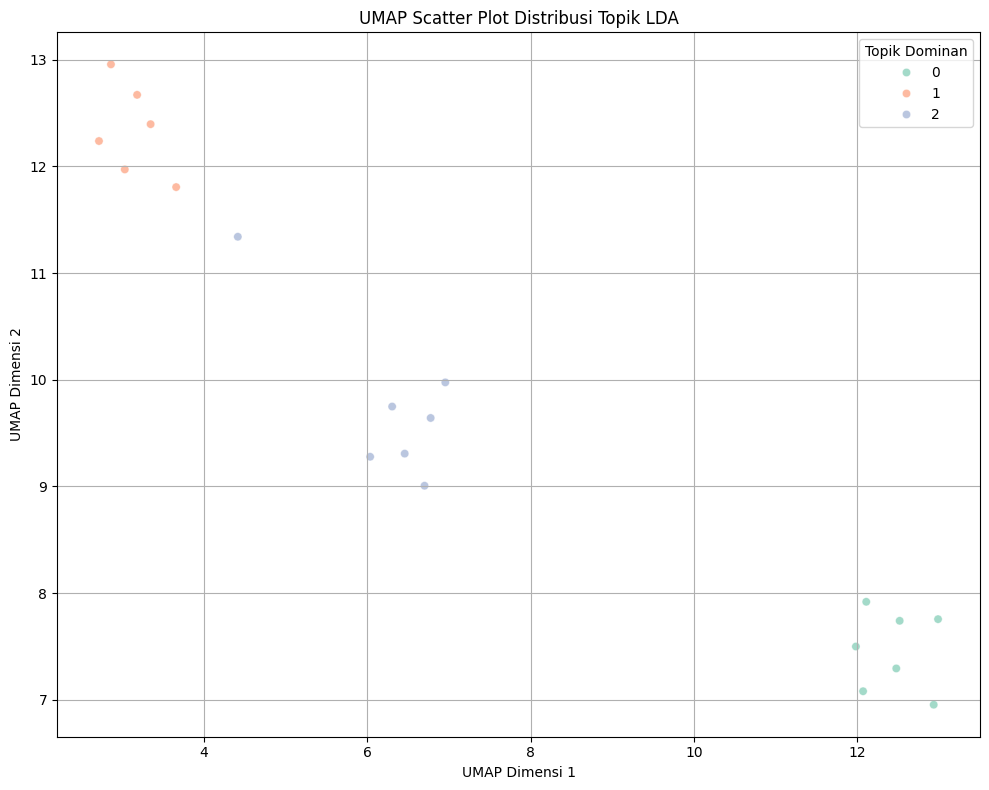

In [19]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Jalankan UMAP pada topic_matrix ---
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(topic_matrix)  # topic_matrix dari LDA

# --- 2. Buat scatter plot ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df['Dominant_Topic'],
    palette='Set2',
    alpha=0.6
)
plt.title("UMAP Scatter Plot Distribusi Topik LDA")
plt.xlabel("UMAP Dimensi 1")
plt.ylabel("UMAP Dimensi 2")
plt.legend(title="Topik Dominan")
plt.grid(True)
plt.tight_layout()
plt.show()


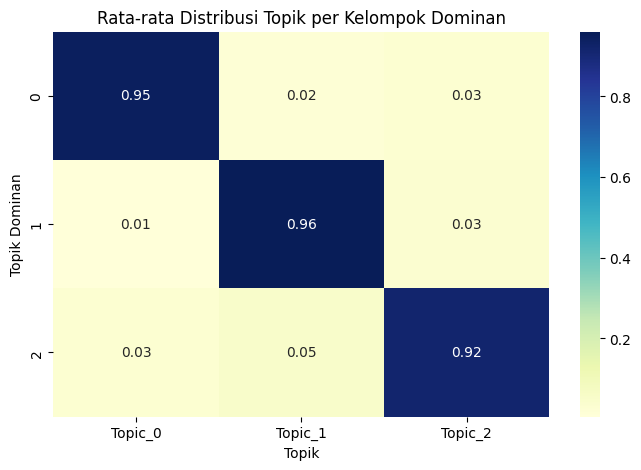

In [20]:
grouped = pd.DataFrame(topic_matrix, columns=[f"Topic_{i}" for i in range(3)])
grouped['Dominant_Topic'] = df['Dominant_Topic']
mean_matrix = grouped.groupby('Dominant_Topic').mean()

plt.figure(figsize=(8, 5))
sns.heatmap(mean_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Rata-rata Distribusi Topik per Kelompok Dominan")
plt.xlabel("Topik")
plt.ylabel("Topik Dominan")
plt.show()


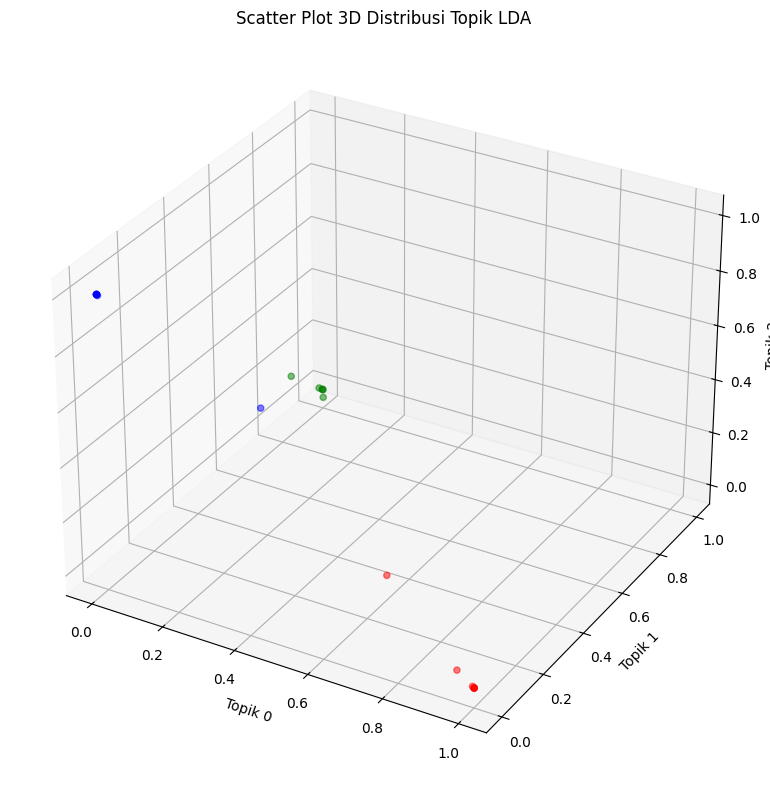

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Ambil koordinat dari topic_matrix ---
x = topic_matrix[:, 0]  # Probabilitas Topik 0
y = topic_matrix[:, 1]  # Probabilitas Topik 1
z = topic_matrix[:, 2]  # Probabilitas Topik 2

# --- 2. Warna berdasarkan topik dominan ---
colors = df['Dominant_Topic'].map({0: 'red', 1: 'green', 2: 'blue'})

# --- 3. Buat plot 3D ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, alpha=0.5)

# --- 4. Label dan judul ---
ax.set_xlabel("Topik 0")
ax.set_ylabel("Topik 1")
ax.set_zlabel("Topik 2")
ax.set_title("Scatter Plot 3D Distribusi Topik LDA")

plt.tight_layout()
plt.show()


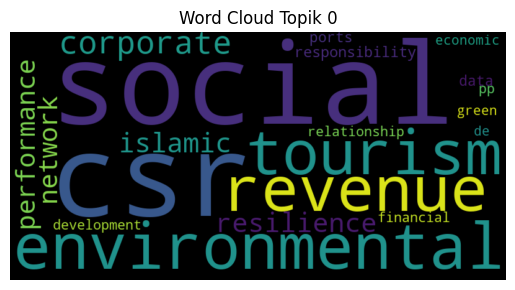

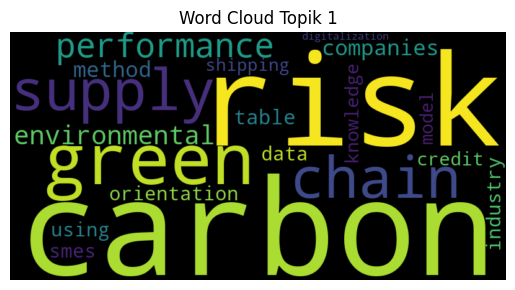

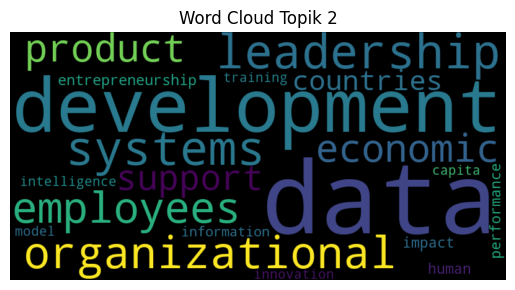

In [23]:
from wordcloud import WordCloud

for idx, topic in enumerate(lda.components_):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400).fit_words({
        vectorizer.get_feature_names_out()[i]: topic[i]
        for i in topic.argsort()[-20:]
    })
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud Topik {idx}")
    plt.show()
